### Step 1: Business Understanding

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market,
since those may be very different from the Chinese market.

The company wants to know:
Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market



### Step 2: Data Understanding  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Importing data using the pandas library

In [2]:
cars = pd.read_csv('C:/Users/ASUS/source_ml/CarPrice_Assignment.csv')
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
cars.shape

(205, 26)

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


### Step 3 : Data Cleaning and Preparation

##### 3-1 Data Cleaning 

In [6]:
pd.DataFrame(cars["CarName"])

,CarName
0,alfa-romero giulia
1,alfa-romero stelvio
2,alfa-romero Quadrifoglio
3,audi 100 ls
4,audi 100ls
...,...
200,volvo 145e (sw)
201,volvo 144ea
202,volvo 244dl
203,volvo 246


In [7]:
CompanyName = cars['CarName'].apply(lambda i : i.split(' ')[0])
CompanyName

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [8]:
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
pd.DataFrame(cars["CompanyName"].unique())

,0
0,alfa-romero
1,audi
2,bmw
3,chevrolet
4,dodge
5,honda
6,isuzu
7,jaguar
8,maxda
9,mazda


In [9]:
cars.CompanyName = cars.CompanyName.str.lower()     
def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')
#cars.CompanyName.unique()
pd.DataFrame(cars["CompanyName"].unique())

,0
0,alfa-romero
1,audi
2,bmw
3,chevrolet
4,dodge
5,honda
6,isuzu
7,jaguar
8,mazda
9,buick


In [10]:
cars = cars.drop("car_ID" , axis=1)
cars.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


##### 3-2 Outlier Analysis

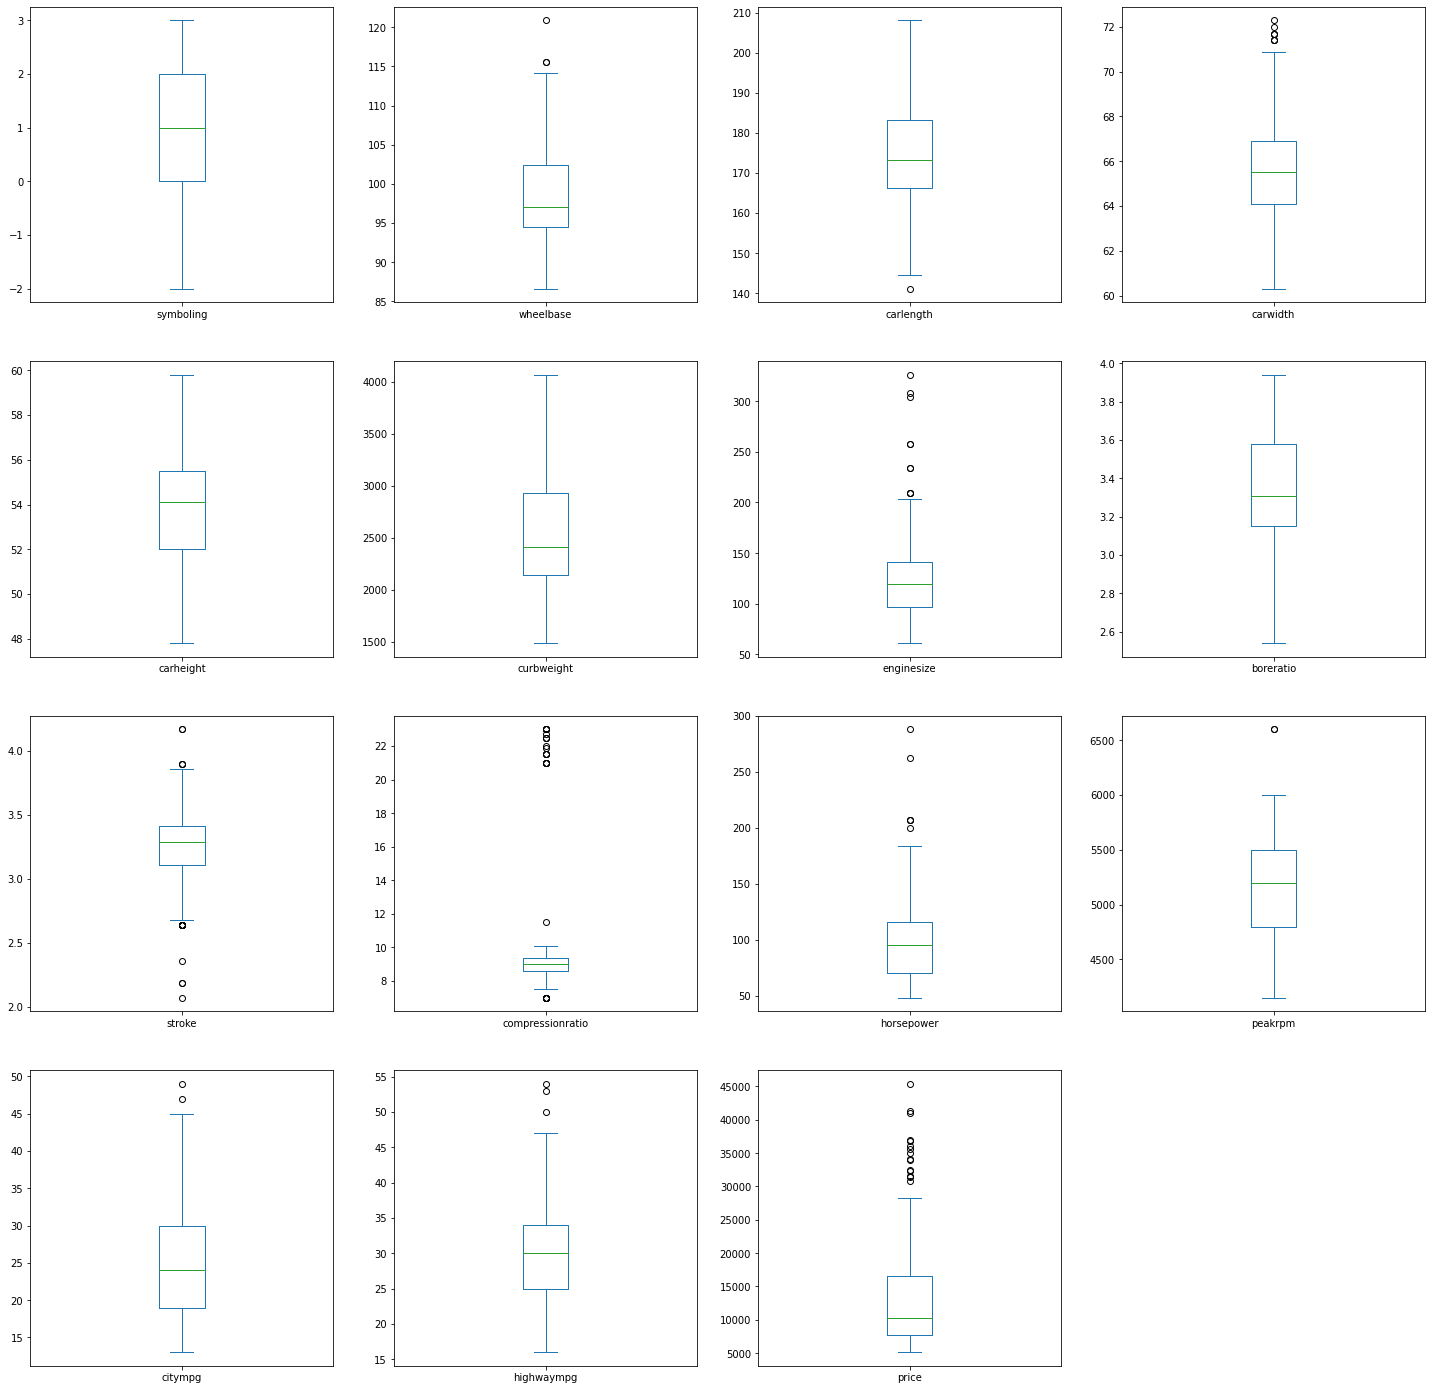

In [11]:
cars.plot(kind="box", subplots=True, layout=(4,4), figsize=(25,25))
plt.show()

##### 3.3.Visualizing the data

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


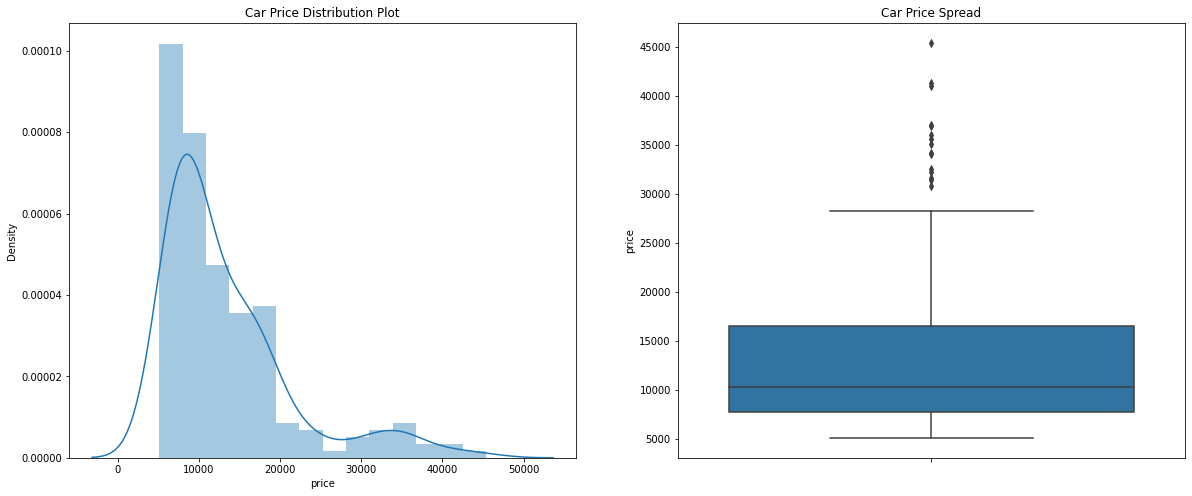

In [12]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

#### Numerical Fetures

In [13]:
numerical_feature = cars.select_dtypes(exclude=['object']).columns
cars[numerical_feature].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


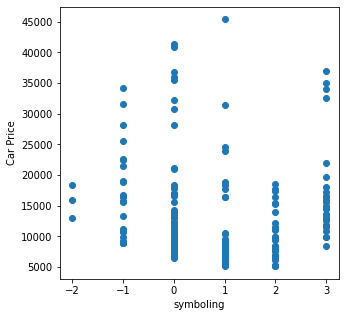

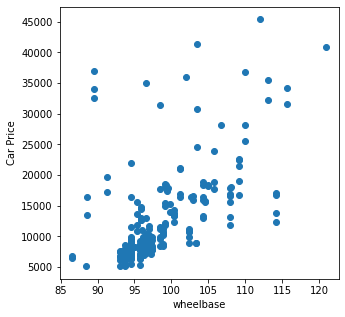

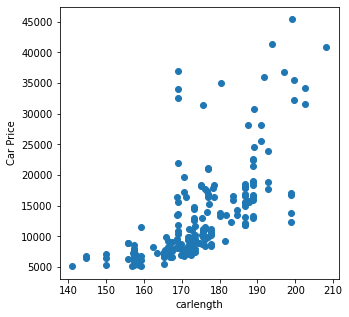

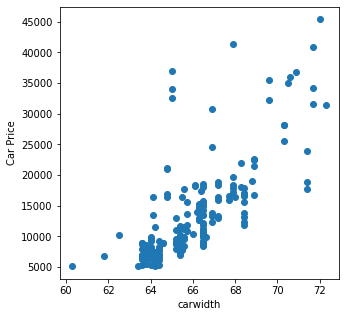

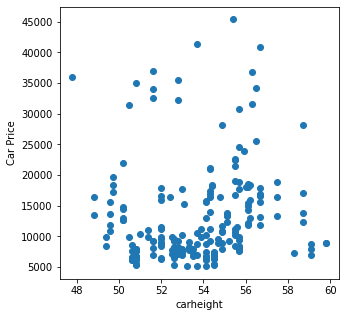

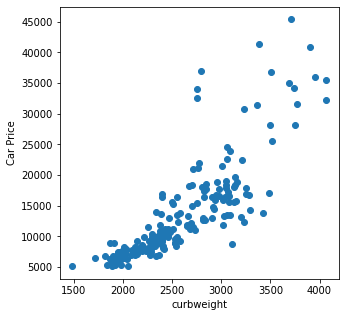

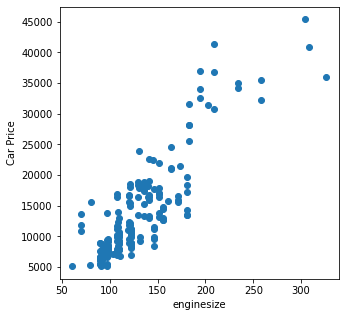

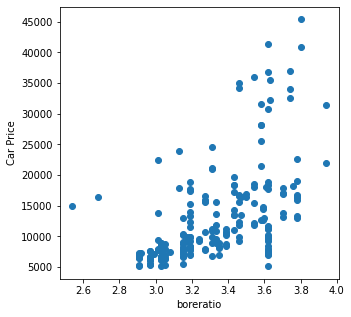

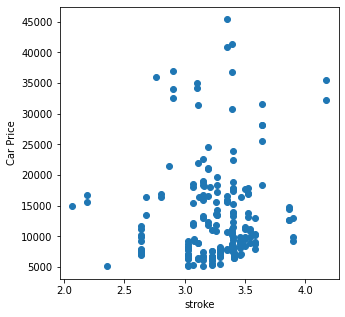

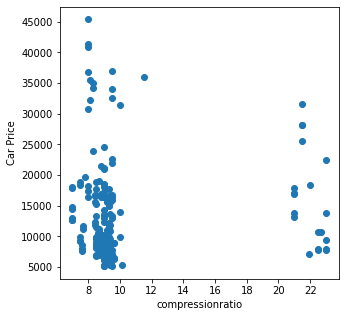

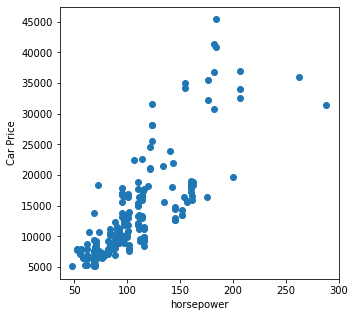

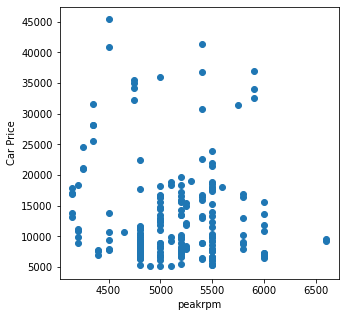

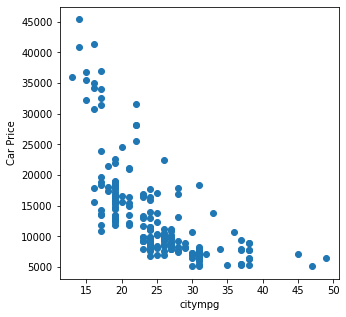

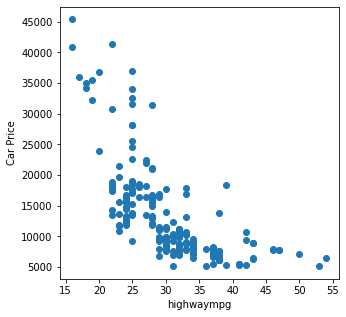

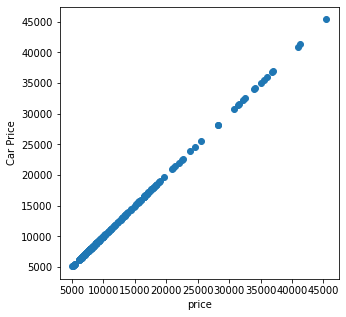

In [14]:
for feature in numerical_feature:
        plt.figure(figsize=(5,5))
        plt.scatter(y=cars["price"], x=cars[feature])
        plt.ylabel("Car Price")
        plt.xlabel(feature)
        plt.show()

#### categorical features

In [15]:
categorical_feature = cars.select_dtypes(include=['object']).columns
cars[categorical_feature].head()

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


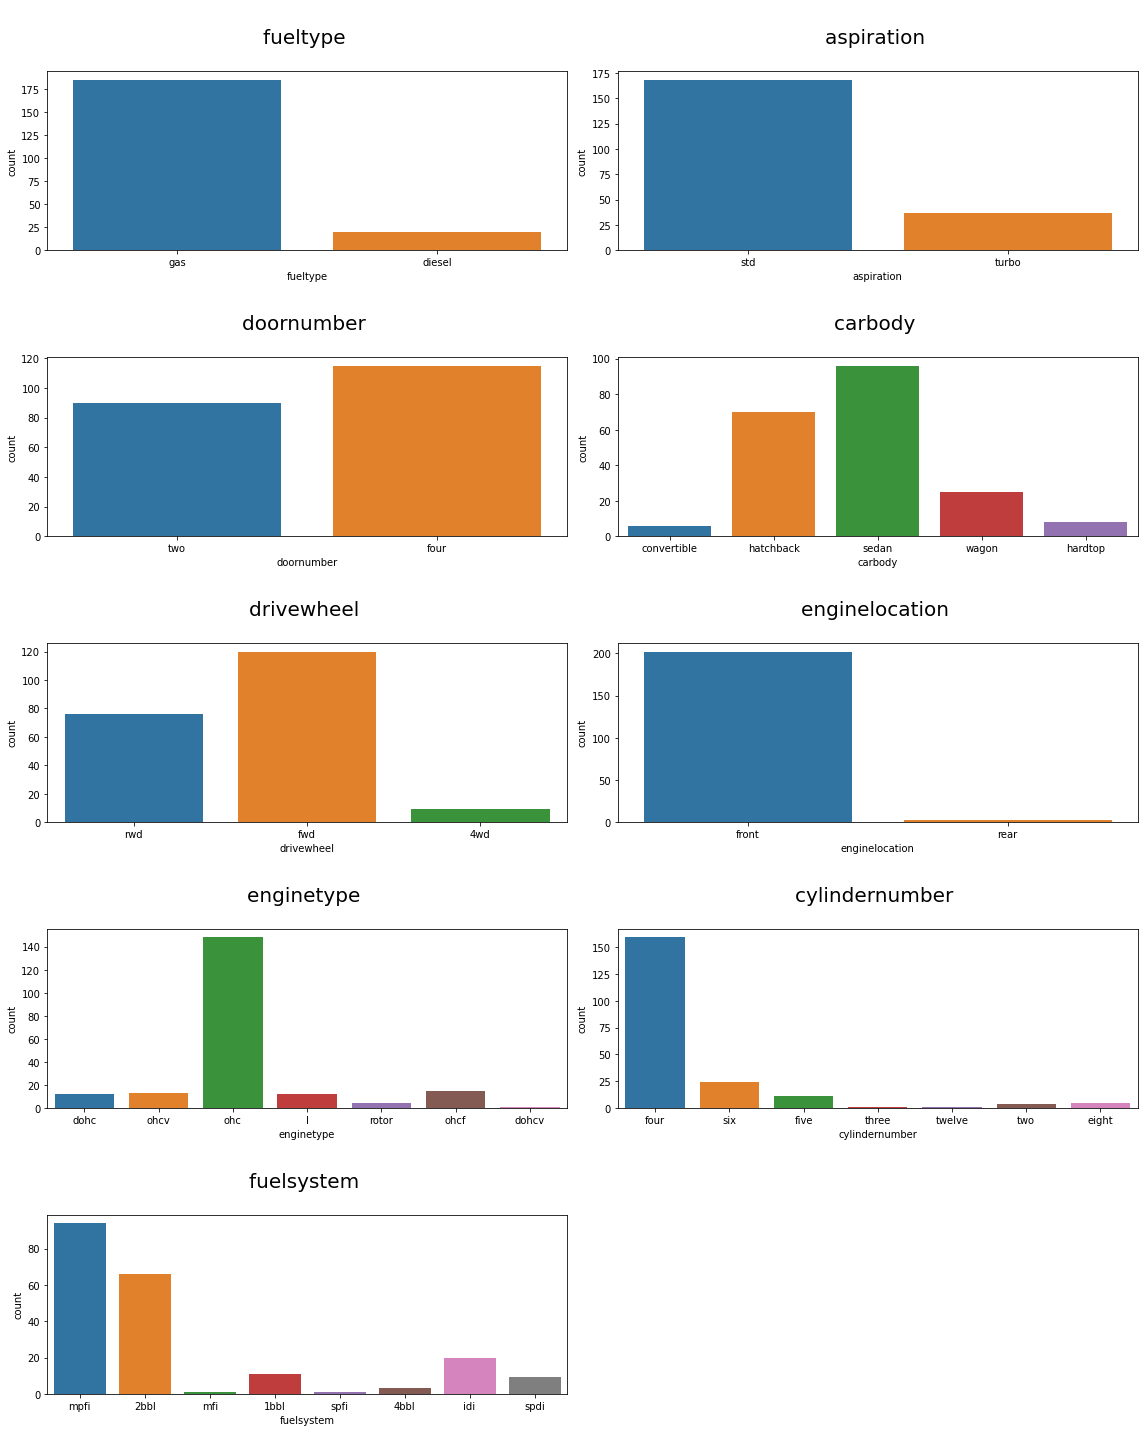

In [16]:
plt.figure(figsize = (16, 20))
n = 1

for i in range(1, len(categorical_feature)):
    if n <= len(categorical_feature):    #len(categorical_feature)=10
        ax = plt.subplot(5, 2, n)
        sns.countplot(x = categorical_feature[i], data = cars, ax = ax)
        plt.title(f"\n{categorical_feature[i]} \n", fontsize = 20)
        
    n += 1

plt.tight_layout()
plt.show()

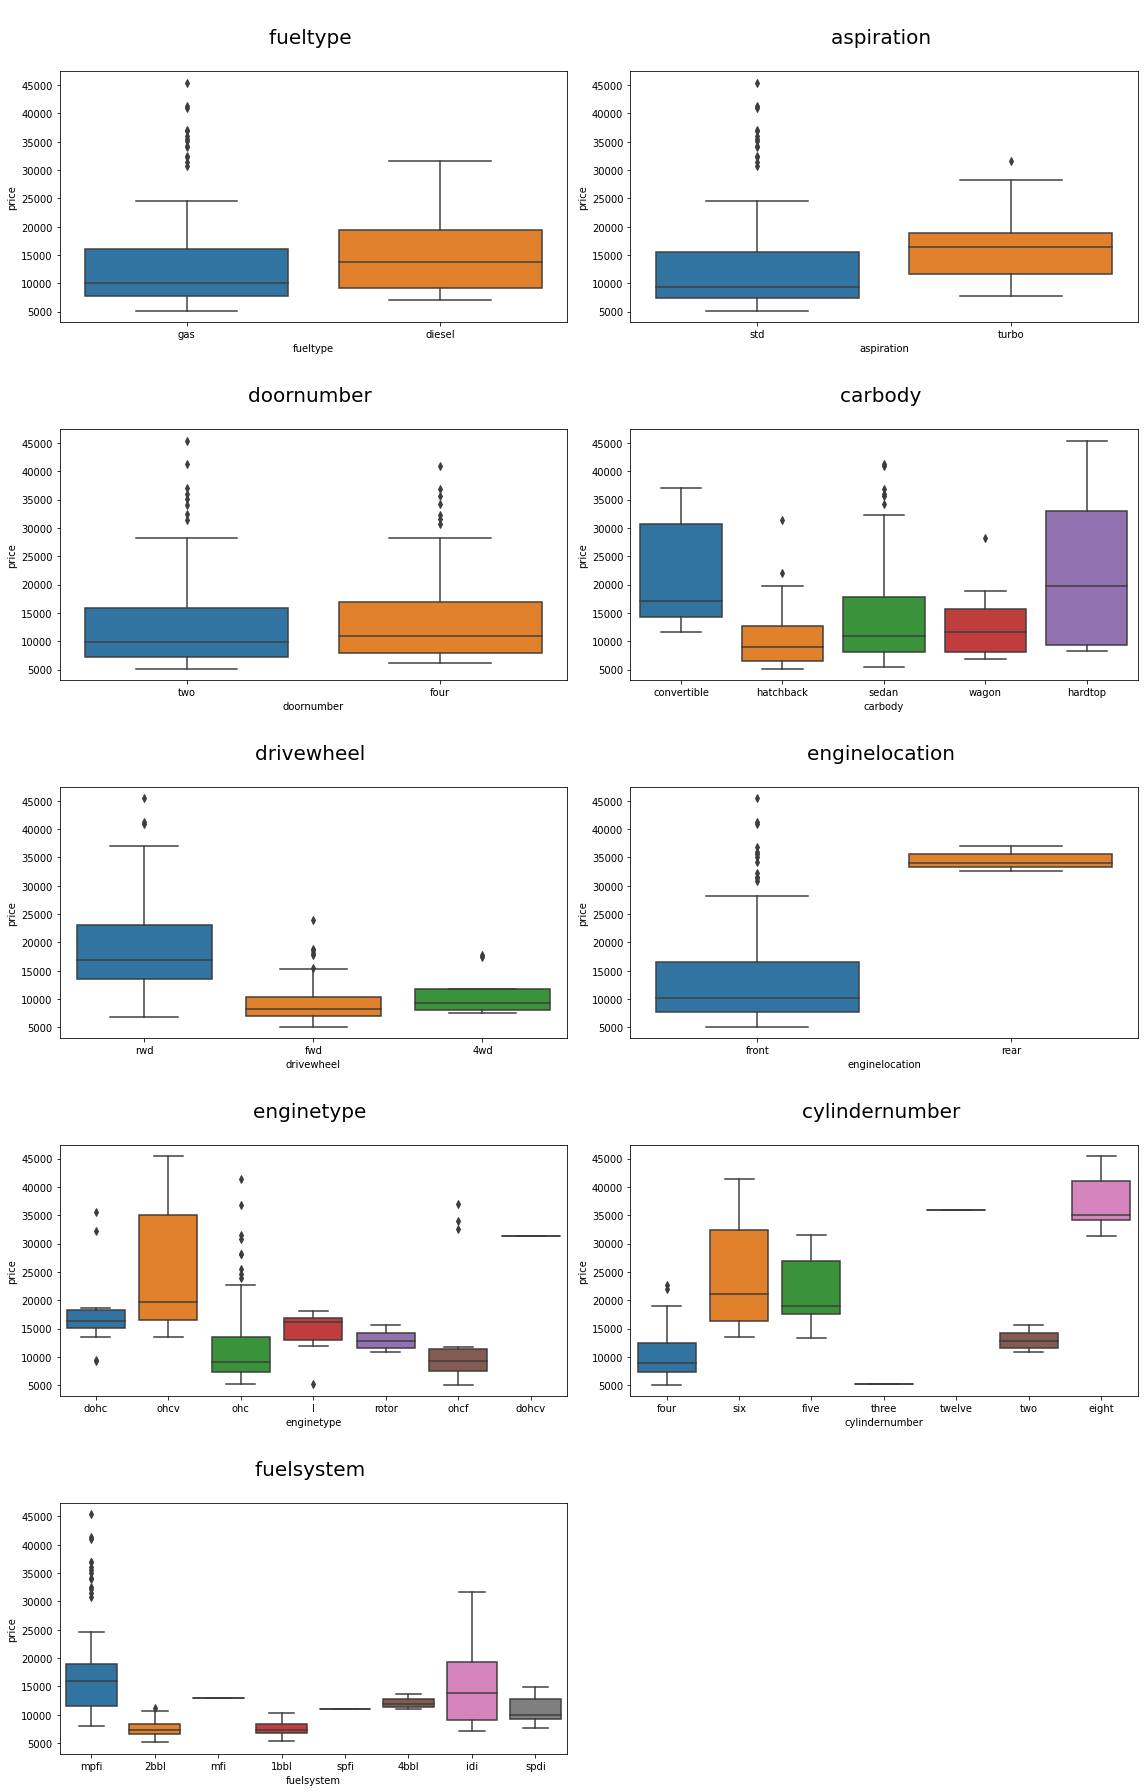

In [17]:
plt.figure(figsize = (16, 25))
n = 1

for i in range(1, len(categorical_feature)):
    if n <= 10:
        ax = plt.subplot(5, 2, n)
        sns.boxplot(x = categorical_feature[i] ,y = cars['price'], data = cars, ax = ax)
        plt.title(f"\n{categorical_feature[i]} \n", fontsize = 20)
        
    n += 1

plt.tight_layout()
plt.show()

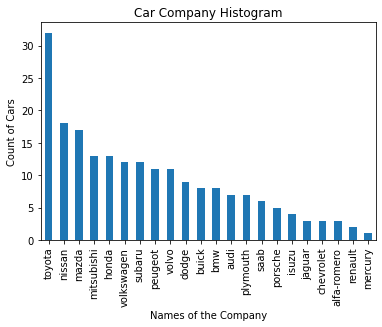

In [9]:
x=cars['CompanyName'].value_counts()
x.plot(kind='bar')

plt.xlabel("Names of the Company")
plt.ylabel("Count of Cars")
plt.title('Car Company Histogram')
plt.show()

##### 3-4-Feature Creation

In [18]:
#Fuel economy
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

In [19]:
#carsrange
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')

bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,  labels=cars_bin)


In [12]:
cars.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70,Medium
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70,Medium
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15,Medium
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70,Medium
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80,Medium


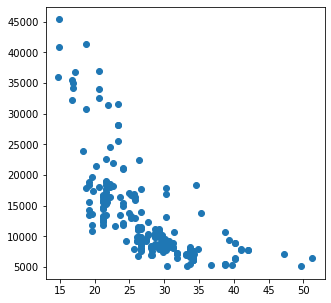

In [20]:
plt.figure(figsize=(5,5))
plt.scatter(y=cars["price"], x=cars['fueleconomy'])
plt.show()


<Figure size 576x576 with 0 Axes>

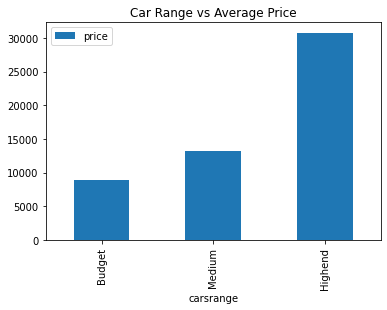

In [21]:
plt.figure(figsize=(8,8))

df = pd.DataFrame(cars.groupby(['carsrange'])['price'].mean())
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

### Step 4 : Modeling

##### 4-1 Encoding

In [22]:
cars_new = cars.drop(['symboling','CompanyName','doornumber','enginelocation','carheight','fuelsystem',
                     'stroke','compressionratio','peakrpm'],axis=1)
cars_new

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price,fueleconomy,carsrange
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,21,27,13495.0,23.70,Medium
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,21,27,16500.0,23.70,Medium
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,19,26,16500.0,22.15,Medium
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,24,30,13950.0,26.70,Medium
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,18,22,17450.0,19.80,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,109.1,188.8,68.9,2952,ohc,four,141,3.78,114,23,28,16845.0,25.25,Medium
201,gas,turbo,sedan,rwd,109.1,188.8,68.8,3049,ohc,four,141,3.78,160,19,25,19045.0,21.70,Medium
202,gas,std,sedan,rwd,109.1,188.8,68.9,3012,ohcv,six,173,3.58,134,18,23,21485.0,20.25,Medium
203,diesel,turbo,sedan,rwd,109.1,188.8,68.9,3217,ohc,six,145,3.01,106,26,27,22470.0,26.45,Medium


In [23]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df


cars_new = dummies('fueltype',cars_new)
cars_new = dummies('aspiration',cars_new)
cars_new = dummies('carbody',cars_new)
cars_new = dummies('drivewheel',cars_new)
cars_new = dummies('enginetype',cars_new)
cars_new = dummies('cylindernumber',cars_new)
cars_new = dummies('carsrange',cars_new)

In [15]:
cars_new.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,...,0,0,0,1,0,0,0,0,1,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,...,0,0,0,1,0,0,0,0,1,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,...,1,0,0,0,1,0,0,0,1,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,0,0,0,1,0,0,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,...,0,0,1,0,0,0,0,0,1,0


#####  4-2 Train-Test Split 

In [24]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(cars_new, train_size = 0.7, test_size = 0.3, random_state = 100)

##### 4-3 Feature scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','citympg','highwaympg','price']
scaler = MinMaxScaler()

In [26]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [27]:
df_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.500000,0.567568,0.068818,...,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.166667,0.270270,0.466890,...,0,0,0,1,0,0,0,0,0,1
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.361111,0.324324,0.122110,...,0,0,0,1,0,0,0,0,0,0
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.222222,0.270270,0.314446,...,0,0,0,1,0,0,0,0,1,0
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.111111,0.135135,0.382131,...,0,0,0,1,0,0,0,0,1,0


##### 4-4 Featuers Selection

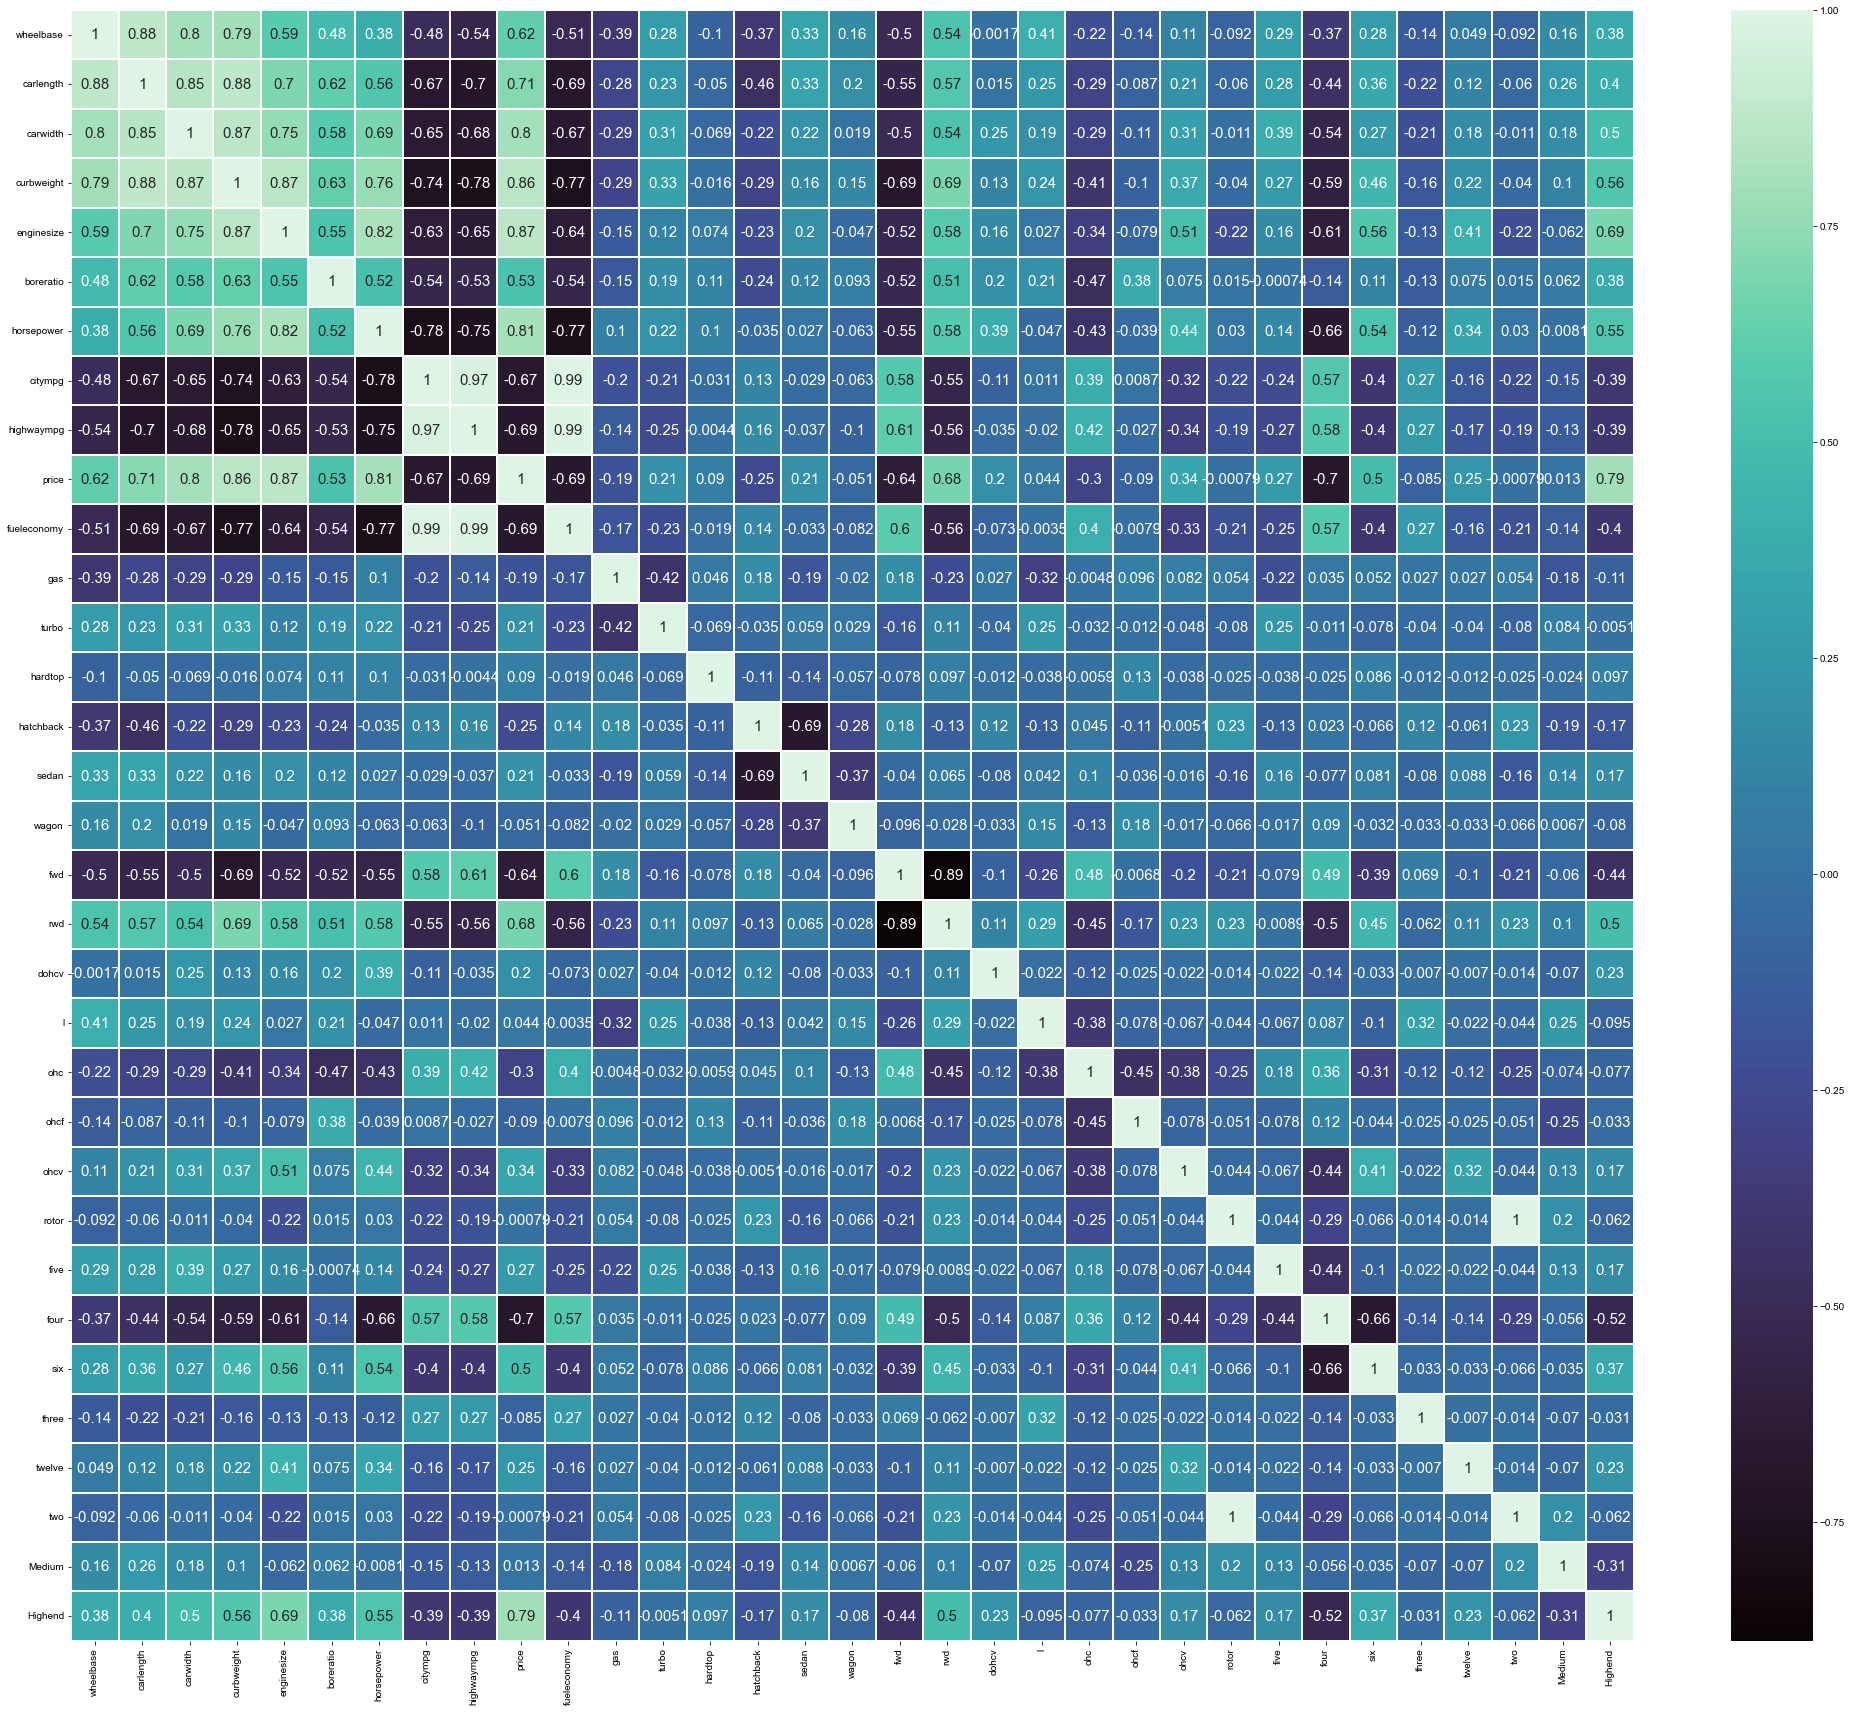

In [28]:
plt.figure(figsize = (35, 30))
sns.heatmap(df_train.corr(), annot = True, annot_kws = {'size' :15},
            linewidth = 2, linecolor = 'white',cmap = 'mako')
sns.set(font_scale=2) 
plt.show()

In [ ]:
#Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth and highend.

In [29]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

##### 4-5- Model Building

In [37]:
#Building model using statsmodel

In [30]:
import statsmodels.api as sm 

X_train_1 = X_train['horsepower']

# Add a constant
X_train_1c = sm.add_constant(X_train_1)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()
lr_1.params

const        -0.019484
horsepower    1.050556
dtype: float64

In [31]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           6.04e-34
Time:                        09:33:09   Log-Likelihood:                 91.997
No. Observations:                 143   AIC:                            -180.0
Df Residuals:                     141   BIC:                            -174.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0195      0.018     -1.068      0.2

In [32]:
X_train_2 = X_train[['horsepower', 'curbweight']]

# Add a constant
X_train_2c = sm.add_constant(X_train_2)

# Create a second fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()

lr_2.params

const        -0.132349
horsepower    0.466601
curbweight    0.602138
dtype: float64

In [33]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     274.8
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           3.34e-49
Time:                        09:33:46   Log-Likelihood:                 130.96
No. Observations:                 143   AIC:                            -255.9
Df Residuals:                     140   BIC:                            -247.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1323      0.018     -7.401      0.0

In [34]:
X_train_3 = X_train[['horsepower', 'curbweight', 'enginesize']]

# Add a constant
X_train_3c = sm.add_constant(X_train_3)

# Create a third fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()
lr_3.params

const        -0.126942
horsepower    0.298222
curbweight    0.402044
enginesize    0.474331
dtype: float64

In [35]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           2.16e-51
Time:                        09:34:12   Log-Likelihood:                 139.18
No. Observations:                 143   AIC:                            -270.4
Df Residuals:                     139   BIC:                            -258.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1269      0.017     -7.469      0.0

In [36]:
X_train_4 = X_train[['horsepower', 'curbweight', 'enginesize','Highend']]

# Add a constant
X_train_4c = sm.add_constant(X_train_4)

# Create a third fitted model
lr_4 = sm.OLS(y_train, X_train_4c).fit()
lr_4.params

const        -0.072285
horsepower    0.300472
curbweight    0.458859
enginesize    0.017730
Highend       0.267991
dtype: float64

In [37]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     324.7
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           3.94e-69
Time:                        09:35:53   Log-Likelihood:                 184.46
No. Observations:                 143   AIC:                            -358.9
Df Residuals:                     138   BIC:                            -344.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0723      0.013     -5.404      0.0

In [ ]:
#check p-value

In [40]:
X_train_new = X_train_4c.drop(["enginesize"], axis = 1)

In [ ]:
#chech vif

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    
    #pythonic
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

checkVIF(X_train_new)

,Features,VIF
0,const,5.51
2,curbweight,2.53
1,horsepower,2.51
3,Highend,1.55


In [64]:
#final model

In [41]:
def build_model(X,y):
    X = sm.add_constant(X)  
    lm = sm.OLS(y,X).fit()  
    print(lm.summary())    
    return X


model_1 = build_model(X_train_new,y_train)

  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     435.9
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           1.76e-70
Time:                        09:40:17   Log-Likelihood:                 184.44
No. Observations:                 143   AIC:                            -360.9
Df Residuals:                     139   BIC:                            -349.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0720      0.013     -5.431      0.0


##### 4-5-2-Residual Analysis of Model

In [45]:
lm = sm.OLS(y_train,X_train_new).fit()
y_pred_train = lm.predict(X_train_new)

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


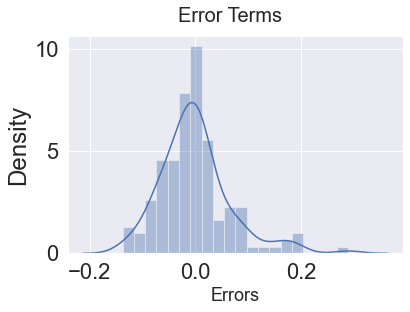

In [46]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)


fig.suptitle('Error Terms', fontsize = 20)             
plt.xlabel('Errors', fontsize = 18);

### Step 5 :Model Evaluation

In [47]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','citympg','highwaympg','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
160,0.265306,0.341732,0.200000,0.132148,0.082969,0.515873,0.116129,1.000000,1.000000,0.058474,...,0,0,0,1,0,0,0,0,0,0
186,0.311953,0.426772,0.315789,0.219125,0.131004,0.515873,0.212903,0.541667,0.580645,0.077398,...,0,0,0,1,0,0,0,0,1,0
59,0.355685,0.522835,0.421053,0.271985,0.187773,0.674603,0.206452,0.500000,0.516129,0.086148,...,0,0,0,1,0,0,0,0,1,0
165,0.230321,0.379528,0.157895,0.214320,0.082969,0.555556,0.387097,0.500000,0.419355,0.097473,...,0,0,0,1,0,0,0,0,0,0
140,0.195335,0.200000,0.136842,0.202307,0.126638,0.857143,0.135484,0.500000,0.483871,0.055099,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,0.486880,0.472441,0.221053,0.344065,0.187773,0.634921,0.232258,0.416667,0.451613,0.088048,...,0,0,0,1,0,0,0,0,0,0
29,0.271137,0.450394,0.400000,0.476694,0.336245,0.841270,0.600000,0.208333,0.258065,0.189120,...,0,0,0,1,0,0,0,0,0,0
182,0.311953,0.426772,0.315789,0.212398,0.078603,0.373016,0.000000,0.958333,0.967742,0.059399,...,0,0,0,1,0,0,0,0,1,0
40,0.288630,0.485039,0.000000,0.265738,0.135371,0.484127,0.219355,0.541667,0.548387,0.122397,...,0,0,0,1,0,0,0,0,0,0


In [48]:
y_test = df_test.pop('price')
X_test = df_test

In [49]:
X_train_new = X_train_new.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns]

X_test_new = sm.add_constant(X_test_new)

In [51]:
X_test_new = X_test[X_train_new.columns]

In [52]:
X_test_new = sm.add_constant(X_test_new)

In [53]:
y_pred_test = lm.predict(X_test_new)

In [55]:
y_pred_test

160    0.024939
186    0.094981
59     0.117606
165    0.145972
140    0.063499
         ...   
28     0.159032
29     0.333114
182    0.026795
40     0.118642
128    0.722888
Length: 62, dtype: float64

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
import numpy as np

In [57]:
r2_score(y_test, y_pred_test)

0.857222174429122

In [56]:
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print('MSE :',mse)
print('RMSE :', rmse)

MSE : 0.006248813879091794
RMSE : 0.07904943946095883


# Knn Regressor

In [60]:
from sklearn.neighbors import KNeighborsRegressor

In [63]:
modelknn = KNeighborsRegressor()
modelknn.fit(X_train, y_train)
pred = modelknn.predict(X_test)
knnMetrics = pd.DataFrame({'Model': 'KNN',
                          'r2score':r2_score(y_test,pred),
                          'MSE': metrics.mean_squared_error(y_test,pred),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y_test,pred))},index=[3])
knnMetrics

,Model,r2score,MSE,RMSE
3,KNN,0.906527,0.004091,0.063961
